<a href="https://colab.research.google.com/github/eraydikyologlu/MyProjects/blob/main/GenderPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D, Activation,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
data = pd.read_csv('age_gender.csv')


In [32]:
data['pixels'].shape


(23705,)

In [33]:
def value_to_image(pixels):
  pixels = np.array(pixels.split(),'float64')
  pixels = np.reshape(pixels,(48,48))
  pixels = pixels / 255.0
  return pixels

data['pixels'] = data['pixels'].apply(value_to_image)

In [34]:
gender_names = train_gender.replace({0:'Male',1:'Female'})

train_img,test_img,train_gender,test_gender = train_test_split(data['pixels'],data['gender'],test_size = 0.2,random_state=37)


In [35]:
type(train_img)

pandas.core.series.Series

In [36]:
def change_image_dimension(data):

  data = np.reshape(data.to_list(),(len(data),48,48,1))
  return data
train_img = change_image_dimension(train_img)
test_img = change_image_dimension(test_img)
train_img = train_img/255.0
test_img = test_img/255.0

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy',patience = 3)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience = 1,min_lr = 0.000001)

In [40]:
model = Sequential()
#1.katman girdi katmanı
model.add(Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

#2.katman
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

#3.katman
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

#çıkış katmanı
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation = 'sigmoid'))

In [43]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(0.01),loss='binary_crossentropy',metrics = ['accuracy'])
r2 = model.fit(train_img,train_gender,validation_data = (test_img,test_gender),
               epochs=20,callbacks = [reduce_lr,early_stop])

Epoch 1/20
593/593 [==============================] - 16s 9ms/step - loss: 0.4721 - accuracy: 0.7708 - val_loss: 0.8289 - val_accuracy: 0.5155 - lr: 0.0100
Epoch 2/20
593/593 [==============================] - 6s 10ms/step - loss: 0.3554 - accuracy: 0.8421 - val_loss: 0.5197 - val_accuracy: 0.7513 - lr: 0.0100
Epoch 3/20
593/593 [==============================] - 6s 11ms/step - loss: 0.3194 - accuracy: 0.8608 - val_loss: 0.3132 - val_accuracy: 0.8570 - lr: 0.0100
Epoch 4/20
593/593 [==============================] - 9s 15ms/step - loss: 0.2948 - accuracy: 0.8700 - val_loss: 0.3280 - val_accuracy: 0.8473 - lr: 0.0100
Epoch 5/20
593/593 [==============================] - 8s 14ms/step - loss: 0.2643 - accuracy: 0.8895 - val_loss: 0.2790 - val_accuracy: 0.8772 - lr: 1.0000e-03
Epoch 6/20
593/593 [==============================] - 10s 17ms/step - loss: 0.2581 - accuracy: 0.8907 - val_loss: 0.2786 - val_accuracy: 0.8772 - lr: 1.0000e-03
Epoch 7/20
593/593 [==============================] - 7

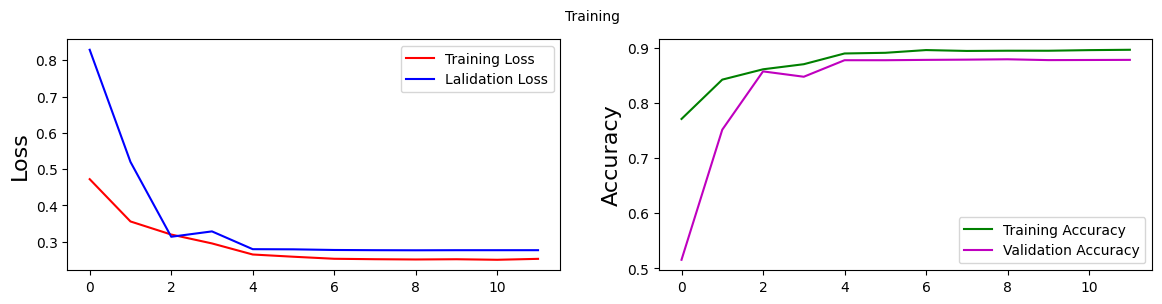

In [44]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.suptitle('Training',fontsize=10)
plt.ylabel('Loss',fontsize=16)
plt.plot(r2.history['loss'],color = 'r',label = 'Training Loss')
plt.plot(r2.history['val_loss'],color = 'b',label = 'Lalidation Loss')
plt.legend(loc = 'upper right')
plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(r2.history['accuracy'],color='g',label='Training Accuracy')
plt.plot(r2.history['val_accuracy'],color='m',label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [45]:
loss,acc = model.evaluate(test_img,test_gender,verbose = 0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.27621588110923767
Test Accuracy: 0.8778738379478455


1/1 [==============================] - 1s 865ms/step


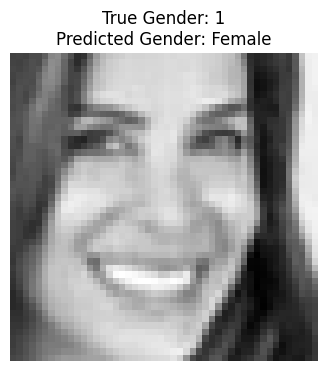

In [46]:
import random

sample_index = random.randint(0, len(test_img) - 1)
sample_image = test_img[sample_index]
sample_label = test_gender.iloc[sample_index]

prediction = model.predict(np.expand_dims(sample_image, axis=0))

predicted_gender = "Male" if prediction < 0.5 else "Female"

plt.figure(figsize=(4, 4))
plt.imshow(sample_image[:, :, 0], cmap='gray')
plt.title(f"True Gender: {sample_label}\nPredicted Gender: {predicted_gender}")
plt.axis('off')
plt.show()
